# Loading Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Reading the Data

In [3]:
test_data=pd.read_csv('dataR2.csv')

# Description

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [5]:
test_data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

# Data Column Identification

In [6]:
test_data['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [7]:
test_data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [8]:
print(test_data.shape)

(116, 10)


#  Exploratory Data Analysis

In [9]:
test_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [10]:
test_data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


# Graphical Approach using Automatic visualization

Shape of your Data Set loaded: (116, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
HOMA,116,float64,0,0.000000,100.000000,0,skewed: cap or drop outliers
Leptin,116,float64,0,0.000000,100.000000,0,skewed: cap or drop outliers
Resistin,116,float64,0,0.000000,100.000000,0,skewed: cap or drop outliers
Adiponectin,115,float64,0,0.000000,99.137931,0,skewed: cap or drop outliers
Insulin,113,float64,0,0.000000,97.413793,0,skewed: cap or drop outliers
MCP.1,113,float64,0,0.000000,97.413793,0,skewed: cap or drop outliers
BMI,110,float64,0,0.000000,94.827586,0,
Age,51,int64,0,0.000000,43.965517,0,
Glucose,50,int64,0,0.000000,43.103448,0,


    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################


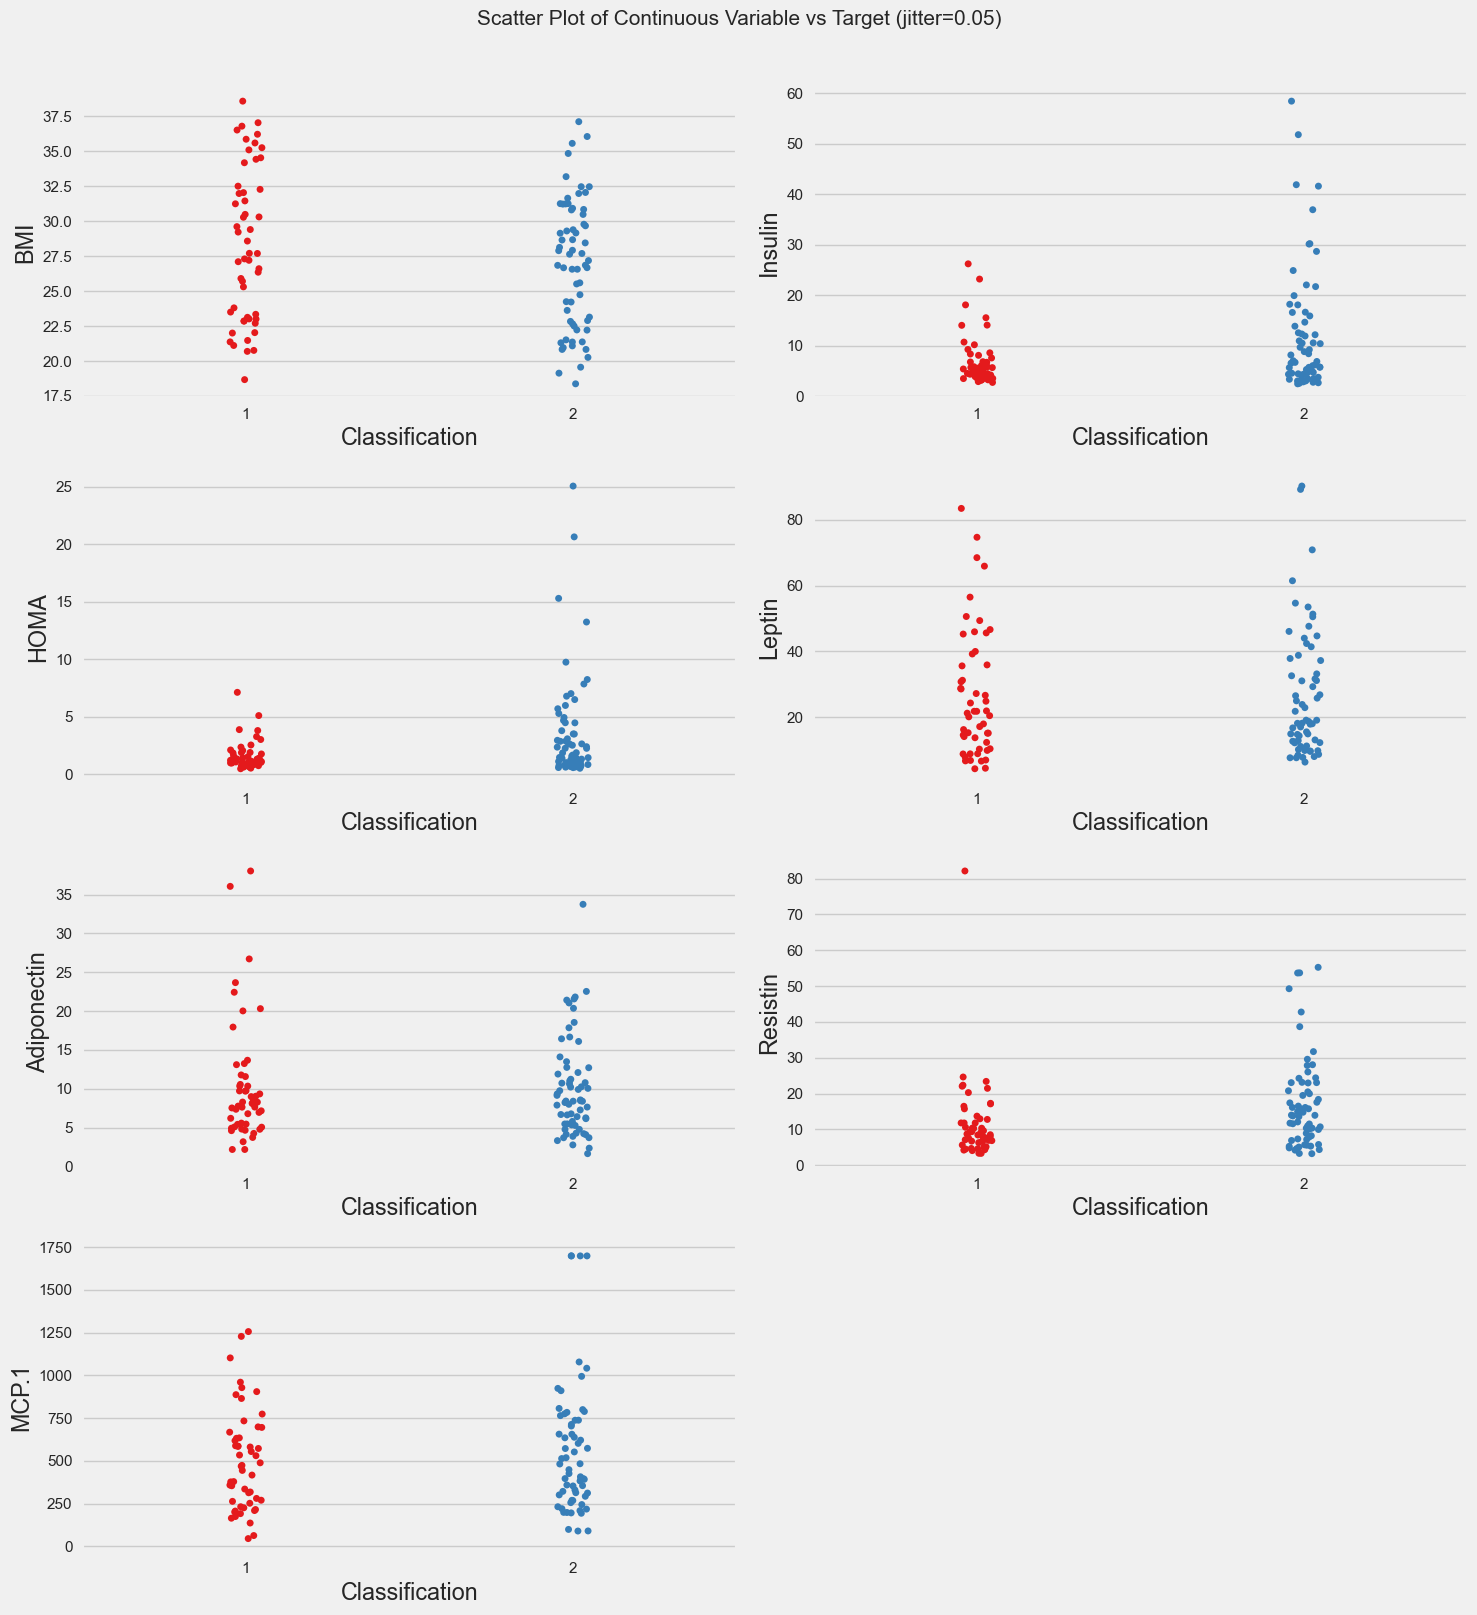

Total Number of Scatter Plots = 28


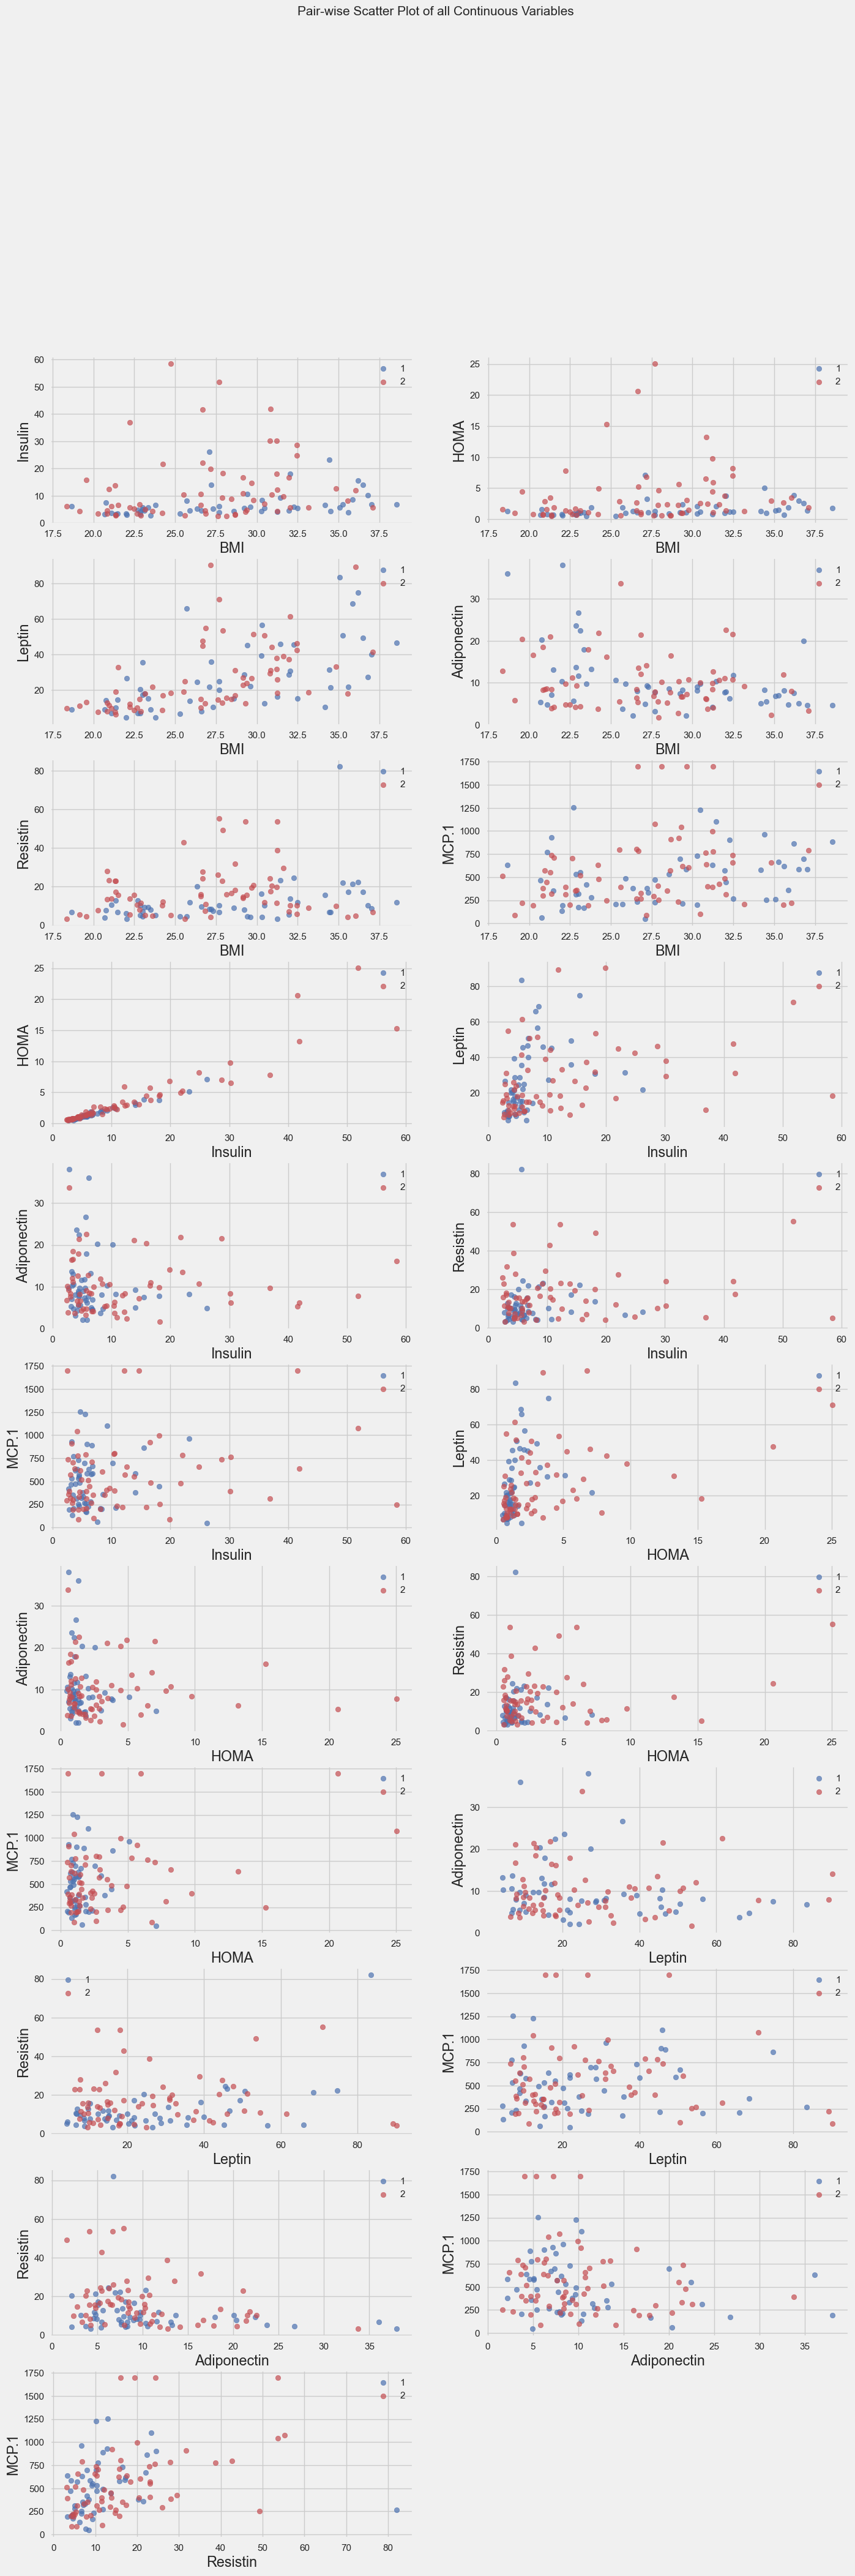

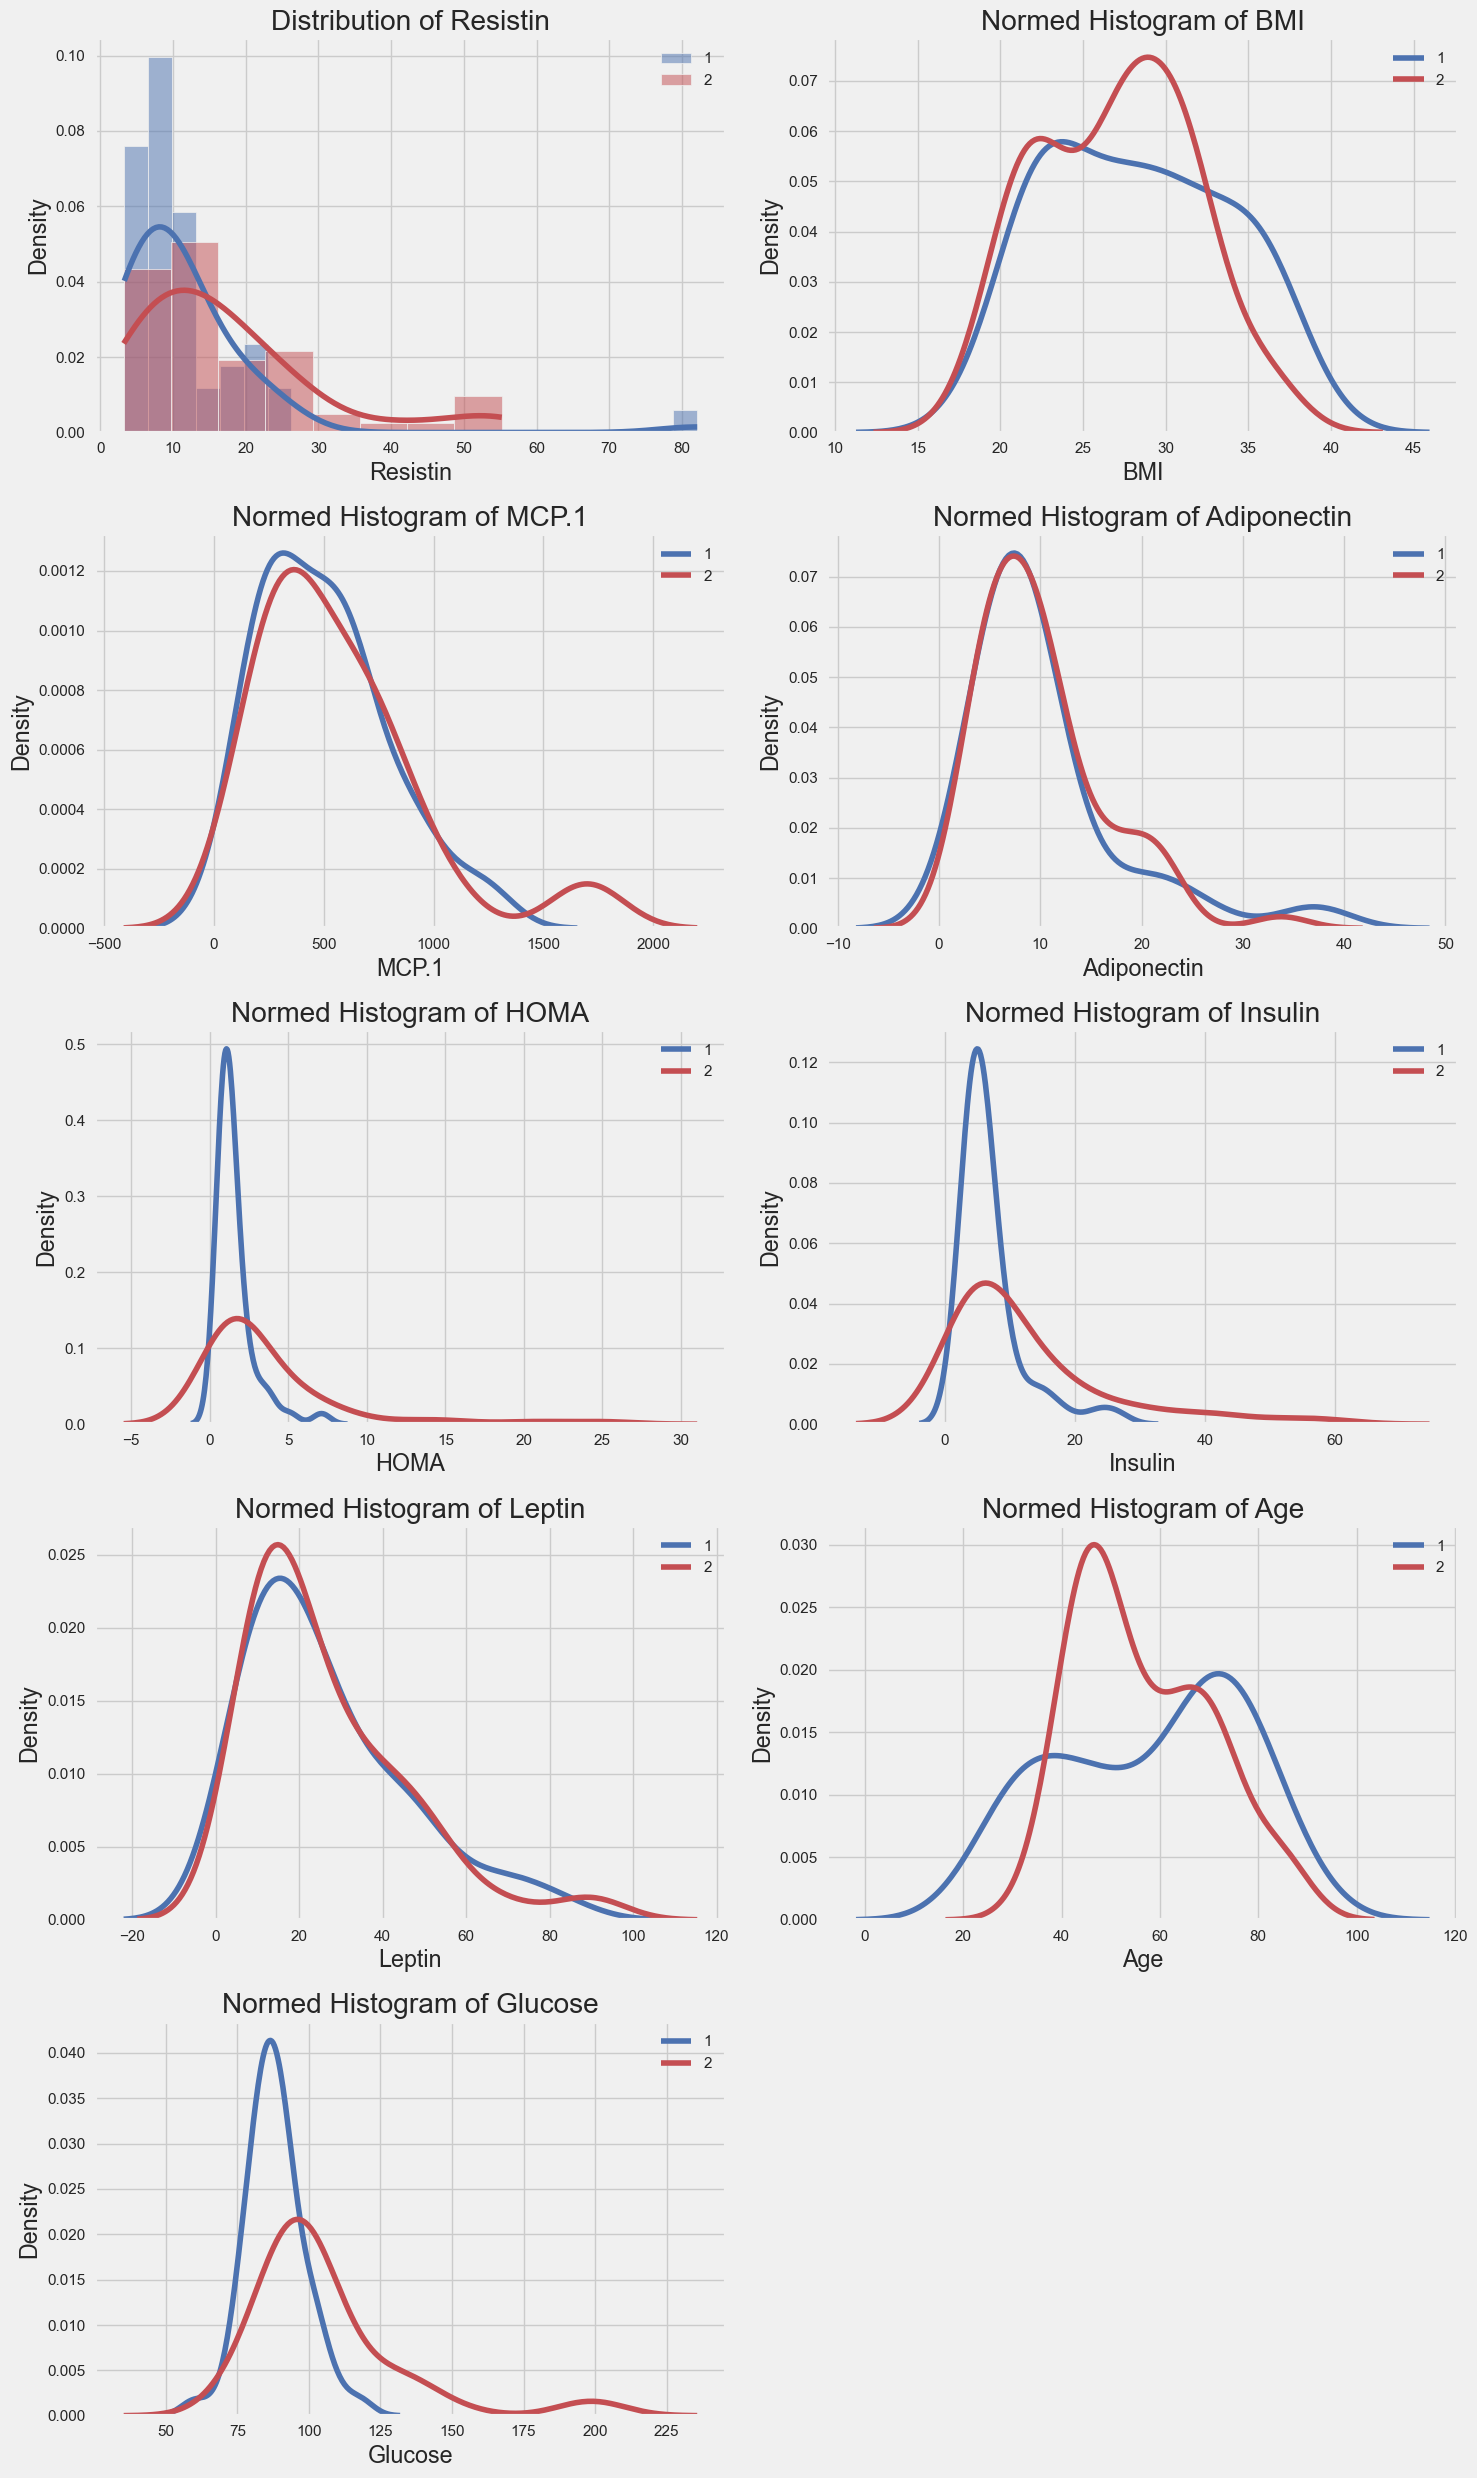

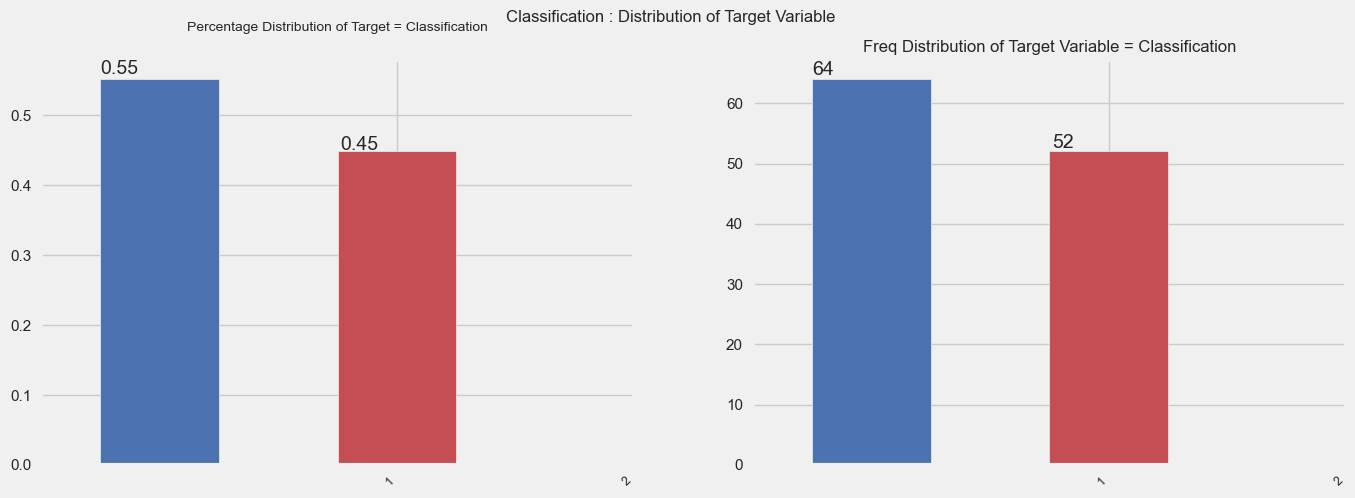

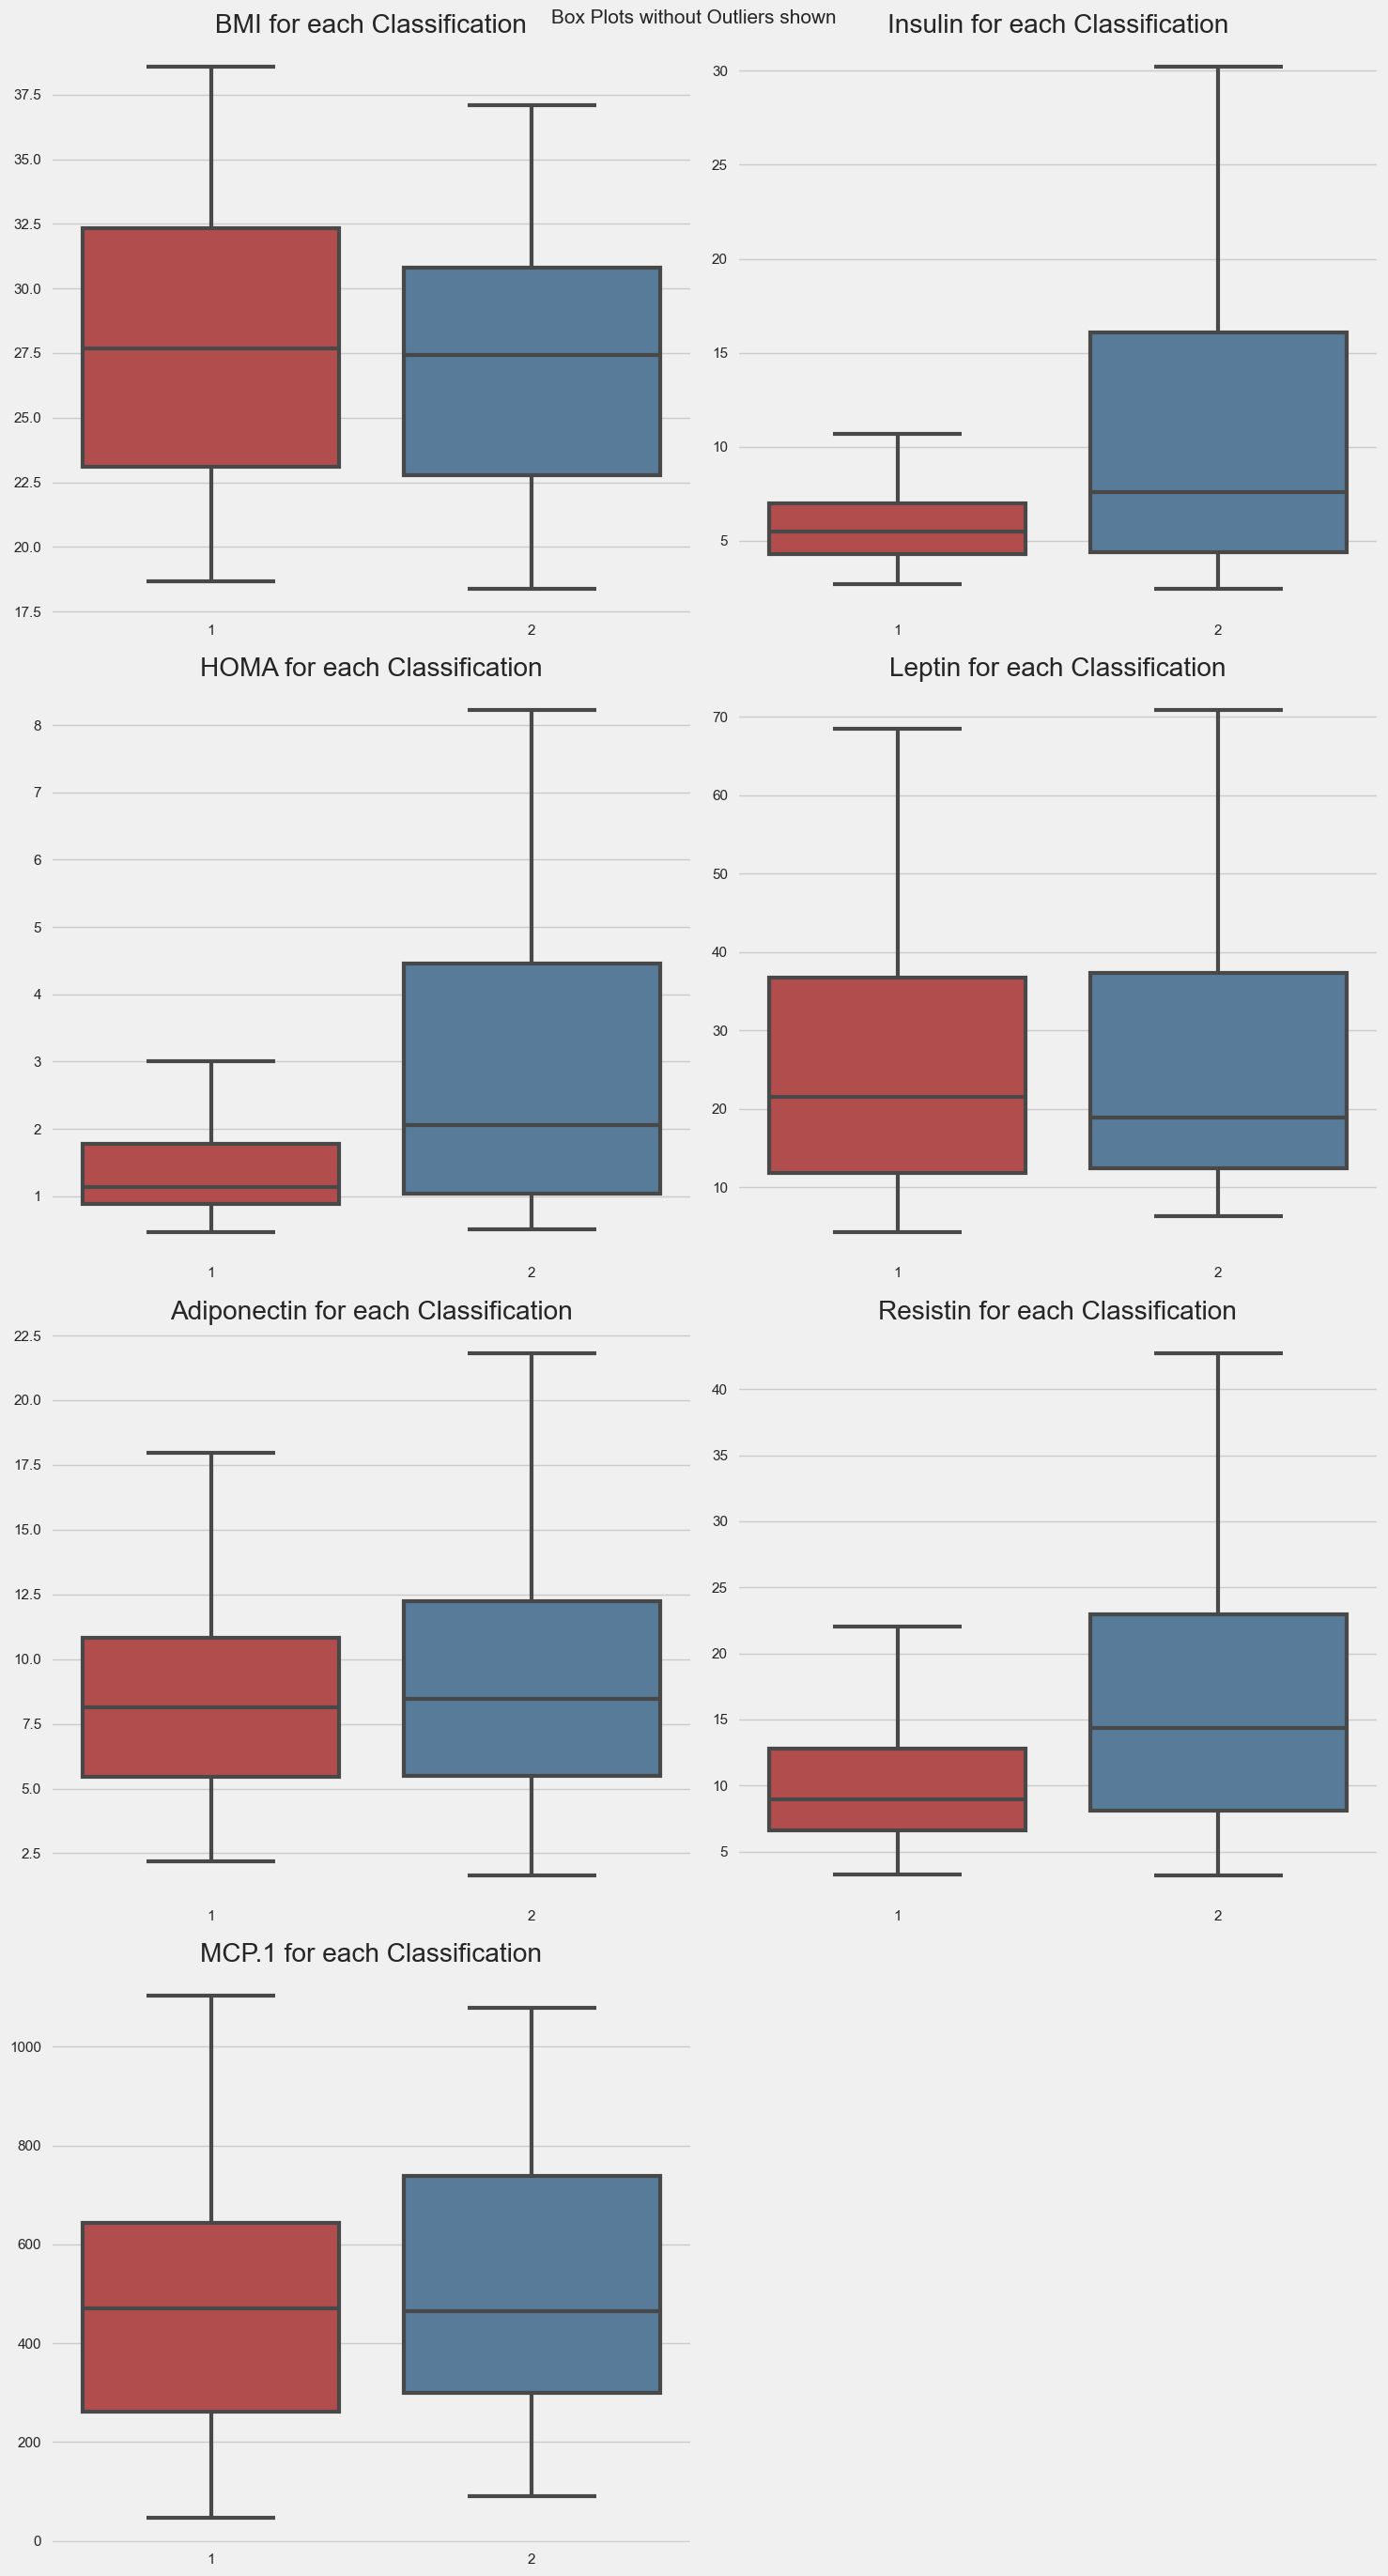

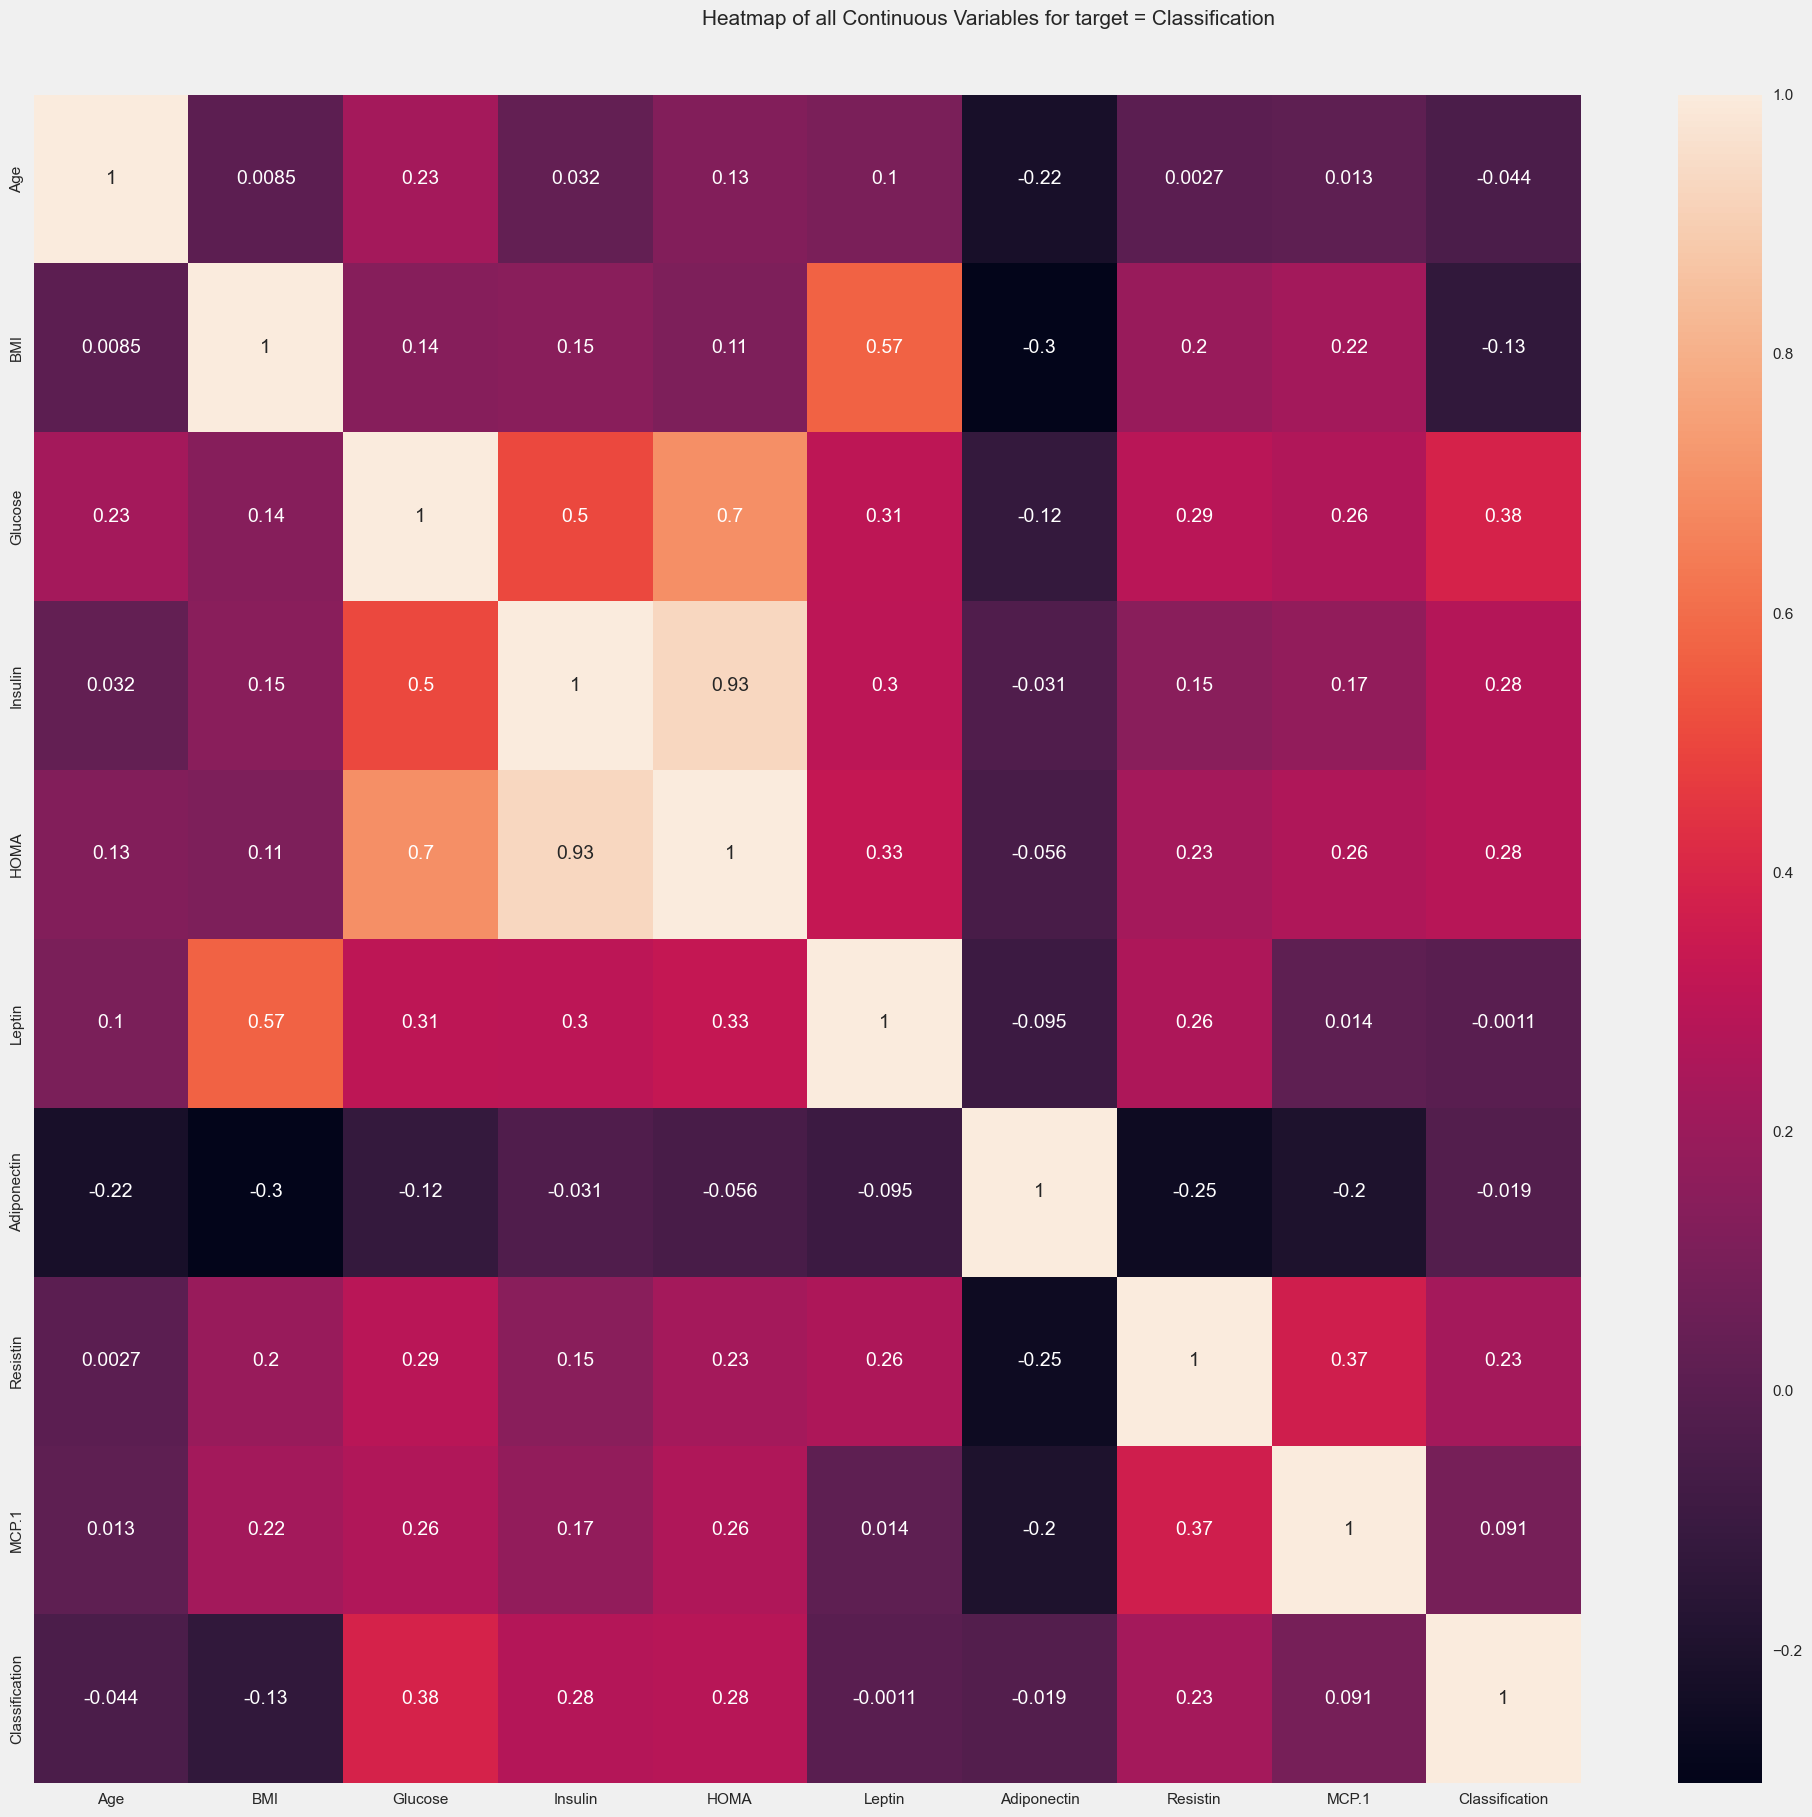

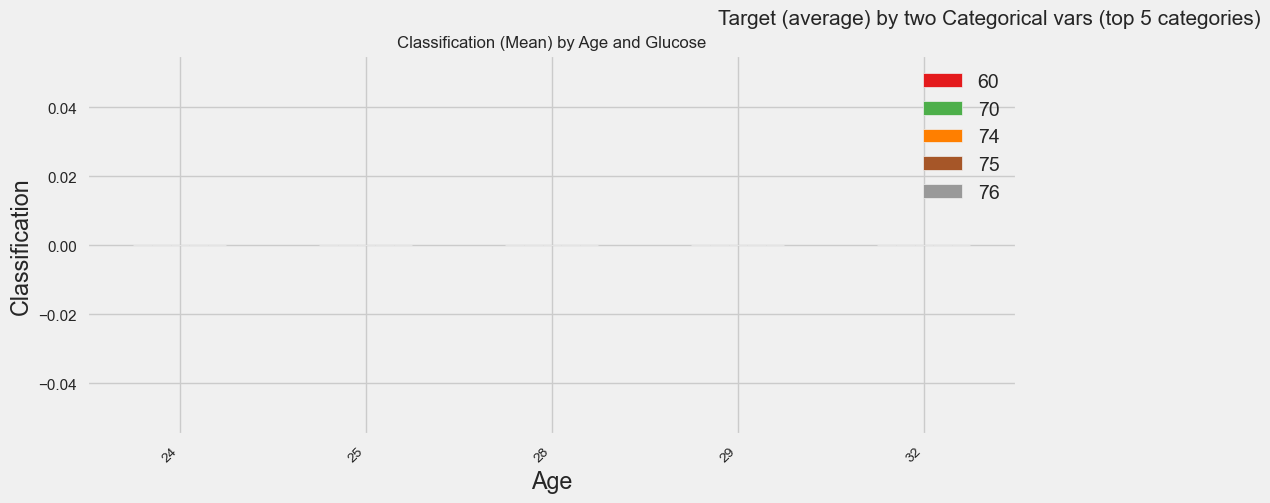

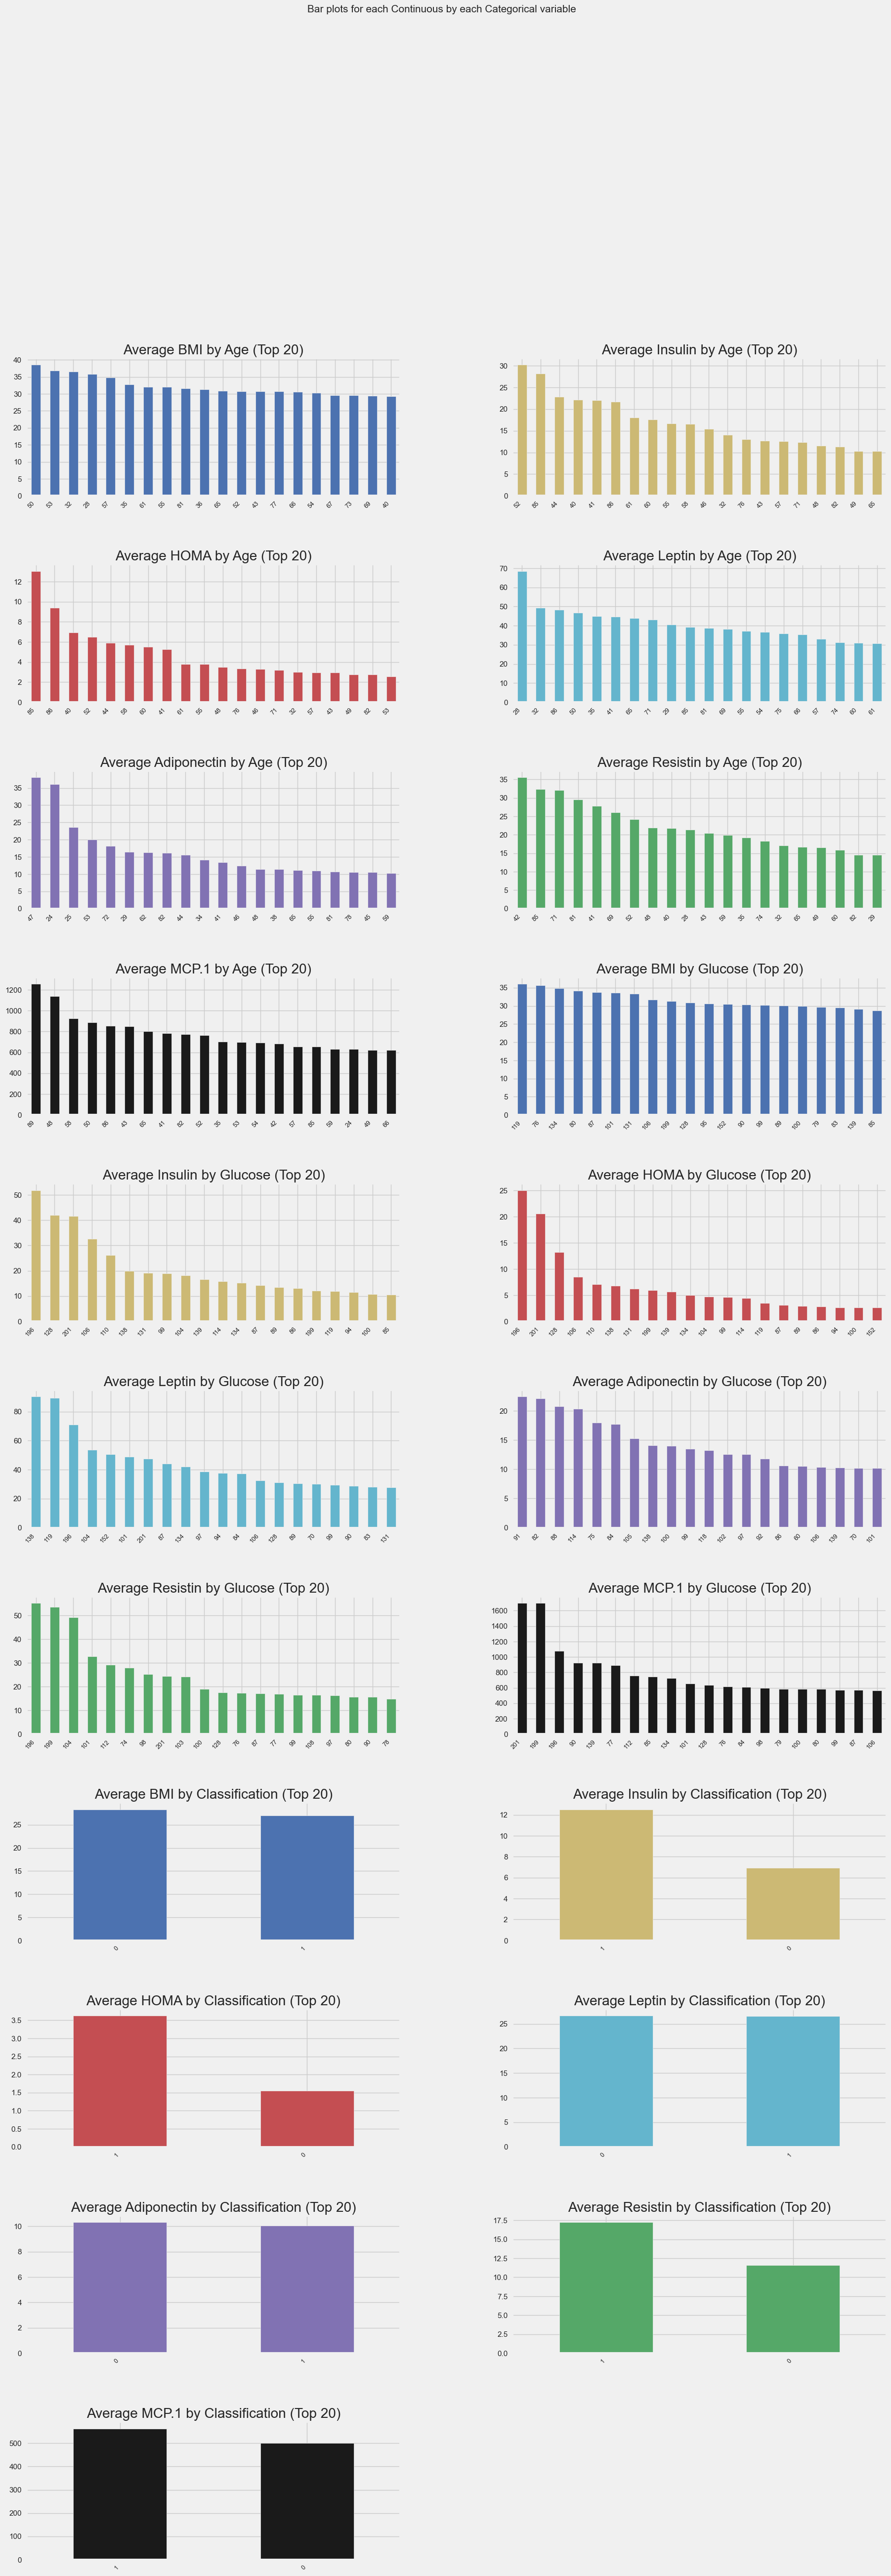

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [28]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
# target='Classification'
df = AV.AutoViz(filename="",sep=',', depVar="Classification",dfte="dataR2.csv", header=0, verbose=1, 
                 lowess=False, chart_format='jpeg', max_rows_analyzed=150000, max_cols_analyzed=30)
%matplotlib inline

# Splitting the Dataset

In [12]:
x=test_data.drop('Classification',axis=1)

In [13]:
y=test_data['Classification'].to_numpy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=36)

# Fitting the model


In [15]:
treemodel= DecisionTreeClassifier()

In [16]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

# Predicting Accuracy for Train Data

In [17]:
treemodel_predict=treemodel.predict(X_train)

In [18]:
accuracy=accuracy_score(y_train,treemodel_predict)

In [19]:
print("Training Accuracy:",accuracy)

Training Accuracy: 1.0


# Predicting Accuracy for Test Data


In [20]:
treemodel_predict_h=treemodel.predict(X_test)

In [21]:
treemodeld_accuracy=accuracy_score(y_test,treemodel_predict_h)

In [22]:
print("Testing Accuracy:",treemodeld_accuracy)

Testing Accuracy: 0.8857142857142857


# Recall,Precision,F1 score

# For Train Data

In [23]:
 print( classification_report(y_train, treemodel_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        42

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



# For Test Data

In [24]:
print(classification_report(y_test,treemodel_predict_h))

              precision    recall  f1-score   support

           1       0.80      0.92      0.86        13
           2       0.95      0.86      0.90        22

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



# Confusion Matrix

# For Train Data


In [25]:
print('Confusion matrix - Train: ','\n',confusion_matrix(y_train,treemodel_predict))


Confusion matrix - Train:  
 [[39  0]
 [ 0 42]]


# For  Test Data

In [26]:
print('Confusion matrix - Test: ','\n',confusion_matrix(y_test,treemodel_predict_h))

Confusion matrix - Test:  
 [[12  1]
 [ 3 19]]


# Correlation Matrix

In [27]:
test_data.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000
